In [1]:
import pandas as pd
import scimap as sm
import anndata as ad
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import json
from matplotlib.colors import ListedColormap
from scipy.stats import mannwhitneyu
warnings.filterwarnings("ignore")

Running SCIMAP  2.3.1


/Users/lukashat/miniforge3/envs/scimap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
extension = 'png'
save_path = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/paper/plots/figures/figure_6/{extension}/'
save_path_supp = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/paper/plots/figures/suppl_figure_6/{extension}/'
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
adata = ad.read_h5ad("/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/adatas/cells_final.h5ad")
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/neighborhood_color_map.json', 'r') as f:
    neighborhood_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/phenotype_color_map.json', 'r') as f:
    phenotype_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/disease_color_map.json', 'r') as f:
    disease_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/disease3_color_map.json', 'r') as f:
    disease3_color_map = json.load(f)
neighborhood_colors = [neighborhood_color_map[cat] for cat in list(adata.obs['cellcharter_CN'].cat.categories)]
neighborhood_colors = ListedColormap(neighborhood_colors)
phenotype_colors = [phenotype_color_map[cat] for cat in list(adata.obs['Phenotype4'].cat.categories)]
phenotype_colors = ListedColormap(phenotype_colors)
disease_colors = [disease_color_map[cat] for cat in list(adata.obs['disease2'].cat.categories)]
disease_colors = ListedColormap(disease_colors)
disease3_colors = [disease3_color_map[cat] for cat in list(adata.obs['disease3'].cat.categories)]
disease3_colors = ListedColormap(disease3_colors)

In [3]:
adata.obs['disease2'] = adata.obs['disease2'].astype(str)
adata = adata[adata.obs['disease2'].isin(['MM_BD', 'MM_noBD'])]
adata.obs['disease2'] = adata.obs['disease2'].astype('category')

In [4]:
radius = 20
sm.tl.spatial_count(adata, x_coordinate='X_centroid', y_coordinate='Y_centroid', phenotype='Phenotype4', method='radius', radius=radius, imageid='image_ID', verbose=True, label='spatial_count') 

Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours withi

AnnData object with n_obs × n_vars = 875395 × 33
    obs: 'Object', 'area', 'Y_centroid', 'X_centroid', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'distance_to_bone', 'image_ID', 'disease', 'patient_ID', 'ROI', 'disease2', 'distance_to_bone_corrected', 'cellcharter_CN', 'Phenotype4', 'HistoneH3', 'disease3'
    var: 'name', 'channel', 'deepcell', 'mean', 'std'
    uns: 'Phenotype4_colors', 'cellcharter_CN_colors', 'spatial', 'spatial_neighbors', 'spatial_count'
    obsm: 'spatial'
    layers: 'arcsinh', 'zscore'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [5]:
disease_mapping = adata.obs[['disease2', 'image_ID']].drop_duplicates()
disease_mapping.set_index('image_ID', inplace=True)


In [6]:
df = adata.uns['spatial_count']
df['Phenotype4'] = adata.obs['Phenotype4']
df['image_ID'] = adata.obs['image_ID']
df['image_ID'] = df['image_ID'].astype(str)
df = df[df['Phenotype4'] == 'Osteoclasts']
df = df.drop(columns=['Phenotype4'])[['PCs', 'image_ID']]
df = df.groupby('image_ID').median()
df.reset_index(inplace=True)
df['disease2'] = df['image_ID'].map(disease_mapping['disease2'])
df

neighbour_phenotype,image_ID,PCs,disease2
0,TS-373_IMC07_UB_001.csv,0.000000,MM_noBD
1,TS-373_IMC07_UB_002.csv,0.200000,MM_noBD
2,TS-373_IMC08_UB_001.csv,0.000000,MM_BD
3,TS-373_IMC08_UB_002.csv,0.250000,MM_BD
4,TS-373_IMC12_UB_001.csv,0.125000,MM_noBD
...,...,...,...
81,TS-373_IMC90.1_B_001.csv,0.666667,MM_BD
82,TS-373_IMC90.1_B_002.csv,0.125000,MM_BD
83,TS-373_IMC93_B_001.csv,0.136364,MM_BD
84,TS-373_IMC93_B_002.csv,0.000000,MM_BD


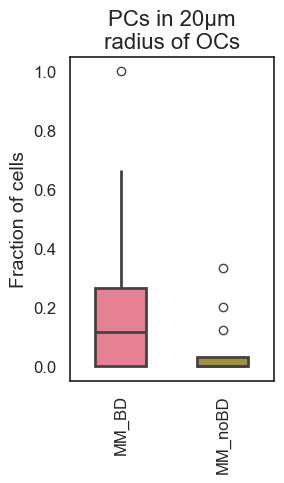

In [7]:
fig, ax = plt.subplots(figsize=(3, 5))
sns.boxplot(data=df, x='disease2', y='PCs', palette=disease_color_map, ax=ax, showcaps=False, linewidth=2, width=0.5)
plt.xticks(rotation=90)
plt.title(f'PCs in {radius}µm\nradius of OCs', fontsize=16)
plt.ylabel('Fraction of cells', fontsize=14)
plt.xlabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(save_path, f'OC_neighborhood_PCs.{extension}'), bbox_inches='tight')


In [8]:
mm_bd = df[df['disease2'] == 'MM_BD']['PCs']
mm_nobd = df[df['disease2'] == 'MM_noBD']['PCs']
stat, p = mannwhitneyu(mm_bd, mm_nobd)
print(f"MM_BD vs MM_noBD: {p}")


MM_BD vs MM_noBD: 0.03602215922979787


In [9]:
df = adata.uns['spatial_count']
df['Phenotype4'] = adata.obs['Phenotype4']
df['image_ID'] = adata.obs['image_ID']
df['image_ID'] = df['image_ID'].astype(str)
df = df[df['Phenotype4'] == 'OB/RUNX2+']
df = df.drop(columns=['Phenotype4'])[['PCs', 'image_ID']]
df = df.groupby('image_ID').median()
df.reset_index(inplace=True)
df['disease2'] = df['image_ID'].map(disease_mapping['disease2'])
df

neighbour_phenotype,image_ID,PCs,disease2
0,TS-373_IMC01_UB_001.csv,0.142857,MM_noBD
1,TS-373_IMC01_UB_002.csv,0.200000,MM_noBD
2,TS-373_IMC07_UB_001.csv,0.166667,MM_noBD
3,TS-373_IMC07_UB_002.csv,0.531250,MM_noBD
4,TS-373_IMC08_UB_001.csv,0.166667,MM_BD
...,...,...,...
125,TS-373_IMC93_B_002.csv,0.250000,MM_BD
126,TS-373_IMC95_B_001.csv,0.066667,MM_BD
127,TS-373_IMC95_B_002.csv,0.000000,MM_BD
128,TS-373_IMC96_B_001.csv,0.000000,MM_BD


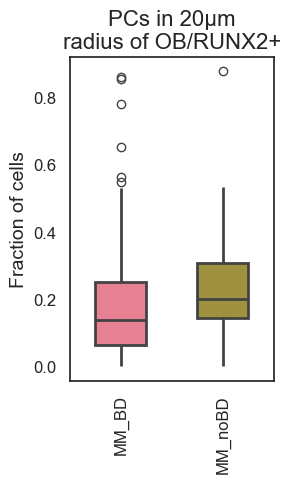

In [10]:
fig, ax = plt.subplots(figsize=(3, 5))
sns.boxplot(data=df, x='disease2', y='PCs', palette=disease_color_map, ax=ax, showcaps=False, linewidth=2, width=0.5)
plt.xticks(rotation=90)
plt.title(f'PCs in {radius}µm\nradius of OB/RUNX2+', fontsize=16)
plt.ylabel('Fraction of cells', fontsize=14)
plt.xlabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(save_path_supp, f'OBs_neighborhood_PCs.{extension}'), bbox_inches='tight')


In [11]:
mm_bd = df[df['disease2'] == 'MM_BD']['PCs']
mm_nobd = df[df['disease2'] == 'MM_noBD']['PCs']
stat, p = mannwhitneyu(mm_bd, mm_nobd)
print(f"MM_BD vs MM_noBD: {p}")

MM_BD vs MM_noBD: 0.0915151018759239


## For Therese

In [12]:
adata = ad.read_h5ad("/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/adatas/cells_final.h5ad")
disease_mapping = adata.obs[['disease2', 'image_ID']].drop_duplicates()
disease_mapping.set_index('image_ID', inplace=True)

In [13]:
radius = 50
sm.tl.spatial_count(adata, x_coordinate='X_centroid', y_coordinate='Y_centroid', phenotype='Phenotype4', method='radius', radius=radius, imageid='image_ID', verbose=True, label='spatial_count') 

Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours withi

AnnData object with n_obs × n_vars = 1007127 × 33
    obs: 'Object', 'area', 'Y_centroid', 'X_centroid', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'distance_to_bone', 'image_ID', 'disease', 'patient_ID', 'ROI', 'disease2', 'distance_to_bone_corrected', 'cellcharter_CN', 'Phenotype4', 'HistoneH3', 'disease3'
    var: 'name', 'channel', 'deepcell', 'mean', 'std'
    uns: 'Phenotype4_colors', 'cellcharter_CN_colors', 'spatial', 'spatial_neighbors', 'spatial_count'
    obsm: 'spatial'
    layers: 'arcsinh', 'zscore'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [14]:
df = adata.uns['spatial_count']
df['Phenotype4'] = adata.obs['Phenotype4']
df['image_ID'] = adata.obs['image_ID']
df['image_ID'] = df['image_ID'].astype(str)
df = df[df['Phenotype4'] == 'Osteoclasts']
df = df.drop(columns=['Phenotype4'])[['DCs', 'CD4 T','CD8 T', 'image_ID']]
df = df.groupby('image_ID').median()
df.reset_index(inplace=True)
df['disease2'] = df['image_ID'].map(disease_mapping['disease2'])
df

neighbour_phenotype,image_ID,DCs,CD4 T,CD8 T,disease2
0,TS-373_IMC03_MGUS_002.csv,0.000000,0.140845,0.015873,MGUS
1,TS-373_IMC04_MGUS_002.csv,0.000000,0.010417,0.000000,MGUS
2,TS-373_IMC05_MGUS_001.csv,0.000000,0.000000,0.000000,SMM
3,TS-373_IMC07_UB_001.csv,0.017857,0.017857,0.035714,MM_noBD
4,TS-373_IMC07_UB_002.csv,0.000000,0.000000,0.282051,MM_noBD
...,...,...,...,...,...
86,TS-373_IMC90.1_B_001.csv,0.000000,0.000000,0.000000,MM_BD
87,TS-373_IMC90.1_B_002.csv,0.026316,0.044776,0.025641,MM_BD
88,TS-373_IMC93_B_001.csv,0.000000,0.009804,0.000000,MM_BD
89,TS-373_IMC93_B_002.csv,0.000000,0.000000,0.000000,MM_BD


In [15]:
df = df.melt(id_vars=['image_ID', 'disease2'], value_vars=['DCs', 'CD4 T','CD8 T'], var_name='celltype', value_name='fraction')

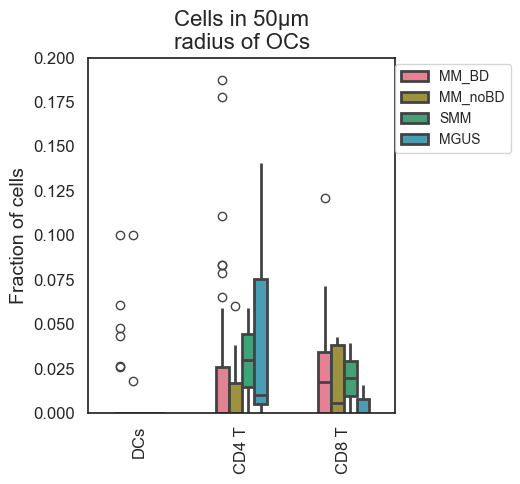

In [16]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=df, x='celltype', y='fraction', hue='disease2', palette=disease_color_map, hue_order=['MM_BD', 'MM_noBD', 'SMM', 'MGUS'], ax=ax, showcaps=False, linewidth=2, width=0.5)
plt.xticks(rotation=90)
plt.title(f'Cells in {radius}µm\nradius of OCs', fontsize=16)
plt.ylabel('Fraction of cells', fontsize=14)
plt.xlabel('')
plt.ylim(0, 0.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='', loc='upper right', fontsize=10, bbox_to_anchor=(1.4, 1))
plt.tight_layout()

In [17]:
disease_mapping = adata.obs[['disease2', 'image_ID']].drop_duplicates()
disease_mapping.set_index('image_ID', inplace=True)
df = adata.obs[['distance_to_bone_corrected', 'image_ID', 'Phenotype4']]
df

,distance_to_bone_corrected,image_ID,Phenotype4
Object 1 in TS-373_IMC77_B_001.csv,26.019224,TS-373_IMC77_B_001.csv,PCs
Object 2 in TS-373_IMC77_B_001.csv,84.005952,TS-373_IMC77_B_001.csv,Unknown
Object 3 in TS-373_IMC77_B_001.csv,123.405835,TS-373_IMC77_B_001.csv,Neutrophils
Object 4 in TS-373_IMC77_B_001.csv,118.713942,TS-373_IMC77_B_001.csv,Unknown
Object 5 in TS-373_IMC77_B_001.csv,110.476242,TS-373_IMC77_B_001.csv,Unknown
...,...,...,...
Object 6622 in TS-373_IMC83_B_001.csv,250.503493,TS-373_IMC83_B_001.csv,Neutrophils
Object 6623 in TS-373_IMC83_B_001.csv,327.273586,TS-373_IMC83_B_001.csv,CD4 T
Object 6624 in TS-373_IMC83_B_001.csv,342.067245,TS-373_IMC83_B_001.csv,Neutrophils
Object 6625 in TS-373_IMC83_B_001.csv,195.256242,TS-373_IMC83_B_001.csv,HLA-DR+ Macs/monos


In [18]:
df = df.groupby(['image_ID', 'Phenotype4']).median()
df.reset_index(inplace=True)
df['disease2'] = df['image_ID'].map(disease_mapping['disease2'])
df.dropna(inplace=True)
df

,image_ID,Phenotype4,distance_to_bone_corrected,disease2
0,TS-373_IMC01_UB_001.csv,Adipocytes,29.000000,MM_noBD
1,TS-373_IMC01_UB_001.csv,CD4 T,51.009803,MM_noBD
2,TS-373_IMC01_UB_001.csv,CD8 T,48.062009,MM_noBD
3,TS-373_IMC01_UB_001.csv,DCs,44.879908,MM_noBD
4,TS-373_IMC01_UB_001.csv,Endothelial,35.761904,MM_noBD
...,...,...,...,...
2259,TS-373_IMC96_B_001.csv,Neutrophils,206.891276,MM_BD
2260,TS-373_IMC96_B_001.csv,OB/RUNX2+,43.046487,MM_BD
2262,TS-373_IMC96_B_001.csv,Osteocytes,0.000000,MM_BD
2263,TS-373_IMC96_B_001.csv,PCs,175.641681,MM_BD


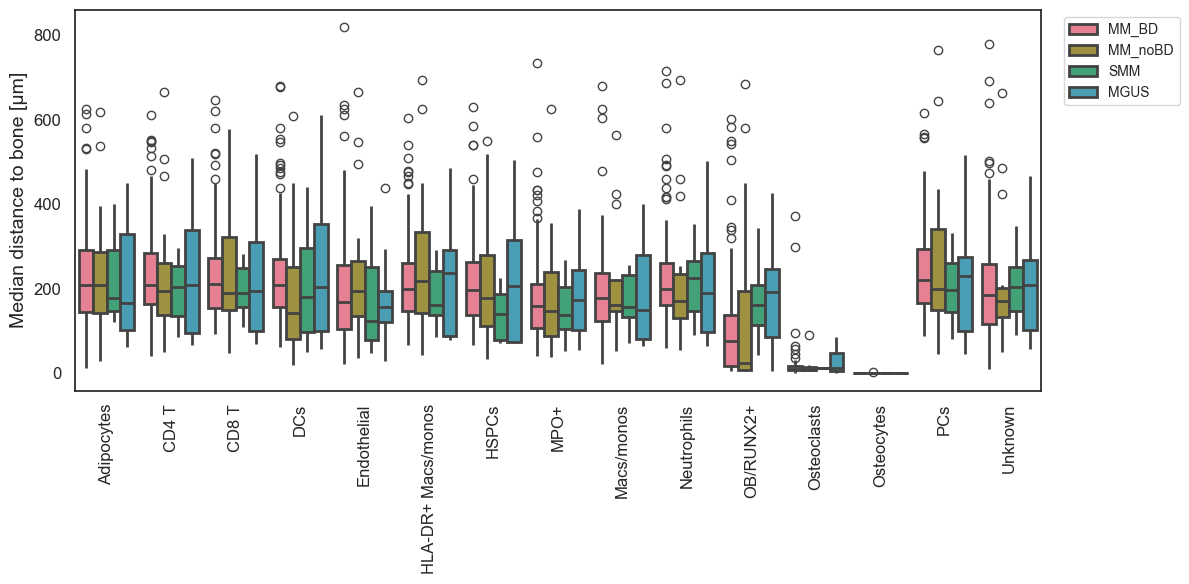

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='Phenotype4', y='distance_to_bone_corrected', hue='disease2', palette=disease_color_map, hue_order=['MM_BD', 'MM_noBD', 'SMM', 'MGUS'], ax=ax, showcaps=False, linewidth=2, width=0.85)
plt.xticks(rotation=90)
plt.title(f'', fontsize=16)
plt.ylabel('Median distance to bone [µm]', fontsize=14)
plt.xlabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='', loc='upper right', fontsize=10, bbox_to_anchor=(1.15, 1))
plt.tight_layout()

In [20]:
adata[adata.obs['disease2'] == 'SMM'].obs['Phenotype4'].value_counts()

Phenotype4
Neutrophils           18330
Unknown               14682
PCs                    9783
HLA-DR+ Macs/monos     6188
MPO+                   4626
CD8 T                  2811
CD4 T                  2438
Macs/monos             2195
Adipocytes             1487
Endothelial            1322
HSPCs                  1035
DCs                     634
Osteocytes              336
OB/RUNX2+               220
Osteoclasts               7
Name: count, dtype: int64

In [21]:
adata[adata.obs['disease2'] == 'MGUS'].obs['Phenotype4'].value_counts()

Phenotype4
Neutrophils           17838
Unknown               15607
PCs                    6355
HLA-DR+ Macs/monos     6247
Macs/monos             4590
MPO+                   3808
CD4 T                  2486
CD8 T                  2363
DCs                    1855
HSPCs                  1206
Osteocytes             1105
Adipocytes             1072
Endothelial             789
OB/RUNX2+               299
Osteoclasts              18
Name: count, dtype: int64

# Abundance of all celltypes around

In [2]:
extension = 'png'
save_path = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/paper/plots/figures/figure_extra/{extension}/'
save_path_supp = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/paper/plots/figures/suppl_figure_extra/{extension}/'
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
adata = ad.read_h5ad("/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/adatas/cells_final.h5ad")
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/neighborhood_color_map.json', 'r') as f:
    neighborhood_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/phenotype_color_map.json', 'r') as f:
    phenotype_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/disease_color_map.json', 'r') as f:
    disease_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/disease3_color_map.json', 'r') as f:
    disease3_color_map = json.load(f)
neighborhood_colors = [neighborhood_color_map[cat] for cat in list(adata.obs['cellcharter_CN'].cat.categories)]
neighborhood_colors = ListedColormap(neighborhood_colors)
phenotype_colors = [phenotype_color_map[cat] for cat in list(adata.obs['Phenotype4'].cat.categories)]
phenotype_colors = ListedColormap(phenotype_colors)
disease_colors = [disease_color_map[cat] for cat in list(adata.obs['disease2'].cat.categories)]
disease_colors = ListedColormap(disease_colors)
disease3_colors = [disease3_color_map[cat] for cat in list(adata.obs['disease3'].cat.categories)]
disease3_colors = ListedColormap(disease3_colors)

In [38]:
radius = 50
sm.tl.spatial_count(adata, x_coordinate='X_centroid', y_coordinate='Y_centroid', phenotype='Phenotype4', method='radius', radius=radius, imageid='image_ID', verbose=True, label='spatial_count') 

Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours withi

AnnData object with n_obs × n_vars = 1007127 × 33
    obs: 'Object', 'area', 'Y_centroid', 'X_centroid', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'distance_to_bone', 'image_ID', 'disease', 'patient_ID', 'ROI', 'disease2', 'distance_to_bone_corrected', 'cellcharter_CN', 'Phenotype4', 'HistoneH3', 'disease3'
    var: 'name', 'channel', 'deepcell', 'mean', 'std'
    uns: 'Phenotype4_colors', 'cellcharter_CN_colors', 'spatial', 'spatial_neighbors', 'spatial_count'
    obsm: 'spatial'
    layers: 'arcsinh', 'zscore'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [39]:
disease_mapping = adata.obs[['disease2', 'image_ID']].drop_duplicates()
disease_mapping.set_index('image_ID', inplace=True)


In [40]:
target = 'OB/RUNX2+'

In [41]:
df = adata.uns['spatial_count']
df['Phenotype4'] = adata.obs['Phenotype4']
df['image_ID'] = adata.obs['image_ID']
df['image_ID'] = df['image_ID'].astype(str)
df = df[df['Phenotype4'] == target]
df.drop(columns=['Phenotype4'], inplace=True)
df = df.groupby('image_ID').median()
df.reset_index(inplace=True)
df['disease2'] = df['image_ID'].map(disease_mapping['disease2'])
df

neighbour_phenotype,image_ID,Adipocytes,CD4 T,CD8 T,Endothelial,HLA-DR+ Macs/monos,HSPCs,MPO+,Macs/monos,Neutrophils,OB/RUNX2+,Osteoclasts,Osteocytes,PCs,Unknown,DCs,disease2
0,TS-373_IMC01_UB_001.csv,0.008065,0.012594,0.042814,0.018001,0.079445,0.026546,0.077677,0.034759,0.233802,0.000000,0.0,0.015889,0.163934,0.202878,0.004386,MM_noBD
1,TS-373_IMC01_UB_002.csv,0.000000,0.034483,0.027027,0.016667,0.026316,0.062500,0.107143,0.000000,0.206897,0.000000,0.0,0.026316,0.135135,0.093750,0.012821,MM_noBD
2,TS-373_IMC02_MGUS_001.csv,0.000000,0.013453,0.028219,0.000000,0.072711,0.000000,0.027973,0.000000,0.298649,0.000000,0.0,0.000000,0.125000,0.329167,0.000000,MGUS
3,TS-373_IMC02_MGUS_002.csv,0.000000,0.000000,0.000000,0.012346,0.025000,0.000000,0.098765,0.000000,0.138889,0.047619,0.0,0.103448,0.131579,0.200000,0.029412,MGUS
4,TS-373_IMC03_MGUS_001.csv,0.000000,0.031250,0.000000,0.010753,0.016949,0.000000,0.118280,0.000000,0.246377,0.010753,0.0,0.000000,0.125000,0.193548,0.000000,MGUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,TS-373_IMC93_B_002.csv,0.000000,0.000000,0.027778,0.035714,0.000000,0.010417,0.020833,0.031250,0.076923,0.023810,0.0,0.000000,0.375000,0.173913,0.000000,MM_BD
148,TS-373_IMC95_B_001.csv,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035088,0.079365,0.634921,0.000000,0.0,0.000000,0.029703,0.128713,0.000000,MM_BD
149,TS-373_IMC95_B_002.csv,0.000000,0.000000,0.000000,0.000000,0.046288,0.000000,0.160714,0.011278,0.554825,0.000000,0.0,0.000000,0.003759,0.162281,0.000000,MM_BD
150,TS-373_IMC96_B_001.csv,0.000000,0.000000,0.007463,0.027778,0.105263,0.011765,0.064516,0.027027,0.265306,0.008696,0.0,0.000000,0.063492,0.229730,0.000000,MM_BD


In [42]:
id_vars_list = ['image_ID', 'disease2']
value_vars_list = [col for col in df.columns if col not in id_vars_list]
df = df.melt(id_vars=id_vars_list, value_vars=value_vars_list, var_name='celltype', value_name='fraction')
df

,image_ID,disease2,celltype,fraction
0,TS-373_IMC01_UB_001.csv,MM_noBD,Adipocytes,0.008065
1,TS-373_IMC01_UB_002.csv,MM_noBD,Adipocytes,0.000000
2,TS-373_IMC02_MGUS_001.csv,MGUS,Adipocytes,0.000000
3,TS-373_IMC02_MGUS_002.csv,MGUS,Adipocytes,0.000000
4,TS-373_IMC03_MGUS_001.csv,MGUS,Adipocytes,0.000000
...,...,...,...,...
2275,TS-373_IMC93_B_002.csv,MM_BD,DCs,0.000000
2276,TS-373_IMC95_B_001.csv,MM_BD,DCs,0.000000
2277,TS-373_IMC95_B_002.csv,MM_BD,DCs,0.000000
2278,TS-373_IMC96_B_001.csv,MM_BD,DCs,0.000000


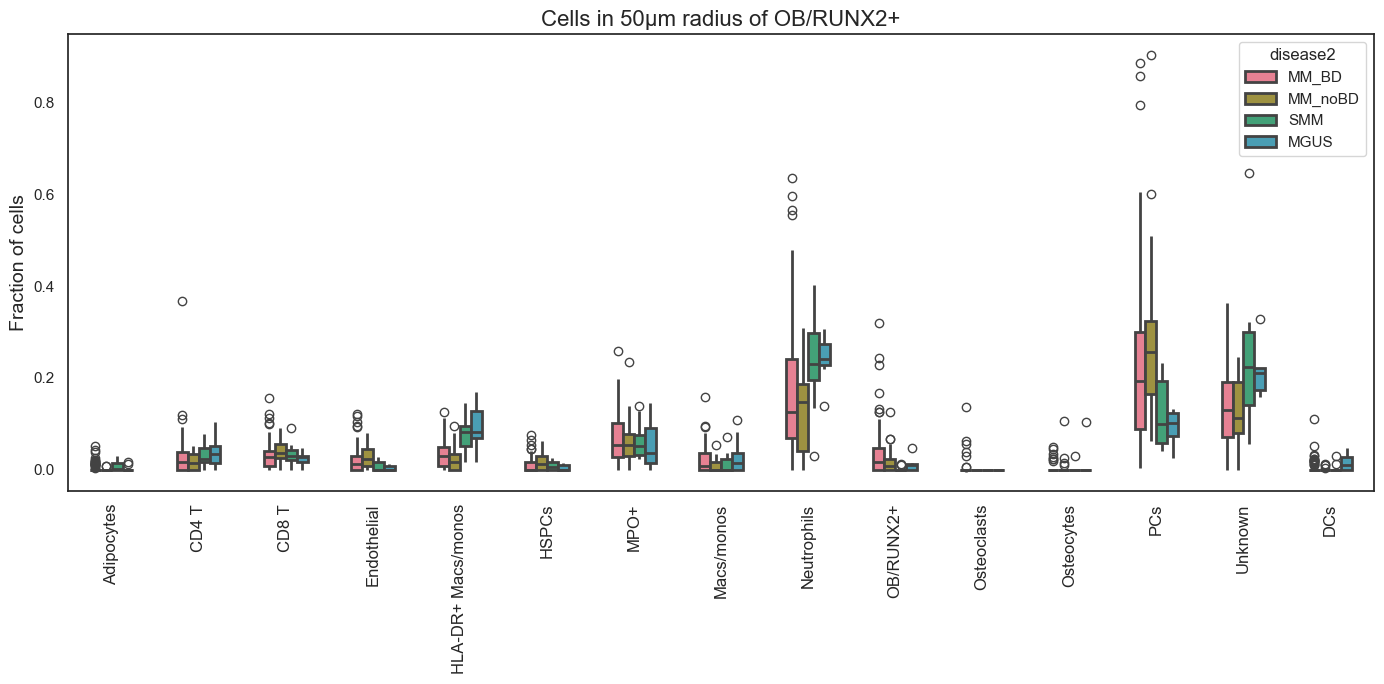

In [43]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(data=df, x='celltype', y='fraction', hue='disease2', palette=disease_color_map, hue_order=['MM_BD', 'MM_noBD', 'SMM', 'MGUS'], ax=ax, showcaps=False, linewidth=2, width=0.5)
plt.xticks(rotation=90)
plt.title(f'Cells in {radius}µm radius of {target}', fontsize=16)
plt.ylabel('Fraction of cells', fontsize=14)
plt.xlabel('')
plt.xticks(fontsize=12)
plt.tight_layout()
if target == 'OB/RUNX2+':
    target = 'OBs'
plt.savefig(os.path.join(save_path, f'{target}_neighborhood_cells_{radius}µm.{extension}'), bbox_inches='tight')